In [64]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [36]:
#fix seed
seed = 7
np.random.seed(seed)

In [37]:
#load and reshape
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')



In [38]:
#normalize
X_train = X_train/255
X_test = X_test/255

In [39]:
#one hot coding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
Y_test.shape 


(10000, 10)

In [48]:
def baseline():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape = (1,28,28),activation='relu',padding='valid',data_format='channels_first'))
    #model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    #compile
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [49]:
model = baseline()
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),nb_epoch=10,batch_size=200,verbose=2)
#evaluate
score = model.evaluate(X_test,Y_test,verbose=0)
print(score)

C:\Users\gjjim\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 37s - loss: 0.4499 - accuracy: 0.8611 - val_loss: 0.1265 - val_accuracy: 0.9599
Epoch 2/10
 - 38s - loss: 0.1329 - accuracy: 0.9597 - val_loss: 0.0802 - val_accuracy: 0.9744
Epoch 3/10
 - 37s - loss: 0.0925 - accuracy: 0.9717 - val_loss: 0.0560 - val_accuracy: 0.9813
Epoch 4/10
 - 35s - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.0568 - val_accuracy: 0.9803
Epoch 5/10
 - 38s - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0395 - val_accuracy: 0.9853
Epoch 6/10
 - 38s - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 7/10
 - 34s - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 8/10
 - 36s - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0345 - val_accuracy: 0.9880
Epoch 9/10
 - 37s - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0280 - val_accuracy: 0.9899
Epoch 10/10
 - 38s - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0331 - val_accuracy: 0.9875
[0.033063

In [44]:
print("Error rate: %f %%" %(100-score[1]*100))

Error rate: 1.069999 %


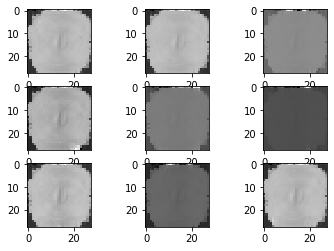

In [69]:
#improve through augmentation
datagen = ImageDataGenerator()
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')
#Y_train = np_utils.to_categorical(Y_train)
#Y_test = np_utils.to_categorical(Y_test)
#use datagen
datagen = ImageDataGenerator(featurewise_center=True,samplewise_center=True,
                            featurewise_std_normalization=True,samplewise_std_normalization=True,
                            zca_whitening=True, rotation_range=90,width_shift_range=0.2,height_shift_range=0.2,
                            vertical_flip=True,horizontal_flip=True)
datagen.fit(X_train)
#destination = os.makedirs('AugImages')
flow = datagen.flow(X_train,Y_train,batch_size=9)
#retrieve a batch of images
X_sample,Y_sample = next(flow)
#create a grid to view
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(X_sample[i].reshape(28,28),cmap=plt.get_cmap('gray'))
plt.show()